In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torchvision.utils as vutils
import torch
from models import Generator
from torchvision import transforms

In [79]:
def plot_loss_curves(disc_loss, gen_loss, epochs):
    plt.figure(figsize=(20, 4))
    plt.plot(disc_loss, color="salmon", linestyle="-")
    plt.plot(gen_loss, color="mediumseagreen", linestyle="-")
    # plt.xticks(range(epochs), range(1, epochs + 1))
    plt.title("Training Loss Across Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Discriminator", "Generator"])
    # plt.grid(color="lightgrey")

In [75]:
file = open("pickled/epoch_disc_loss", "rb")
epoch_disc_loss = pickle.load(file)
file.close()

file = open("pickled/epoch_gen_loss", "rb")
epoch_gen_loss = pickle.load(file)
file.close()

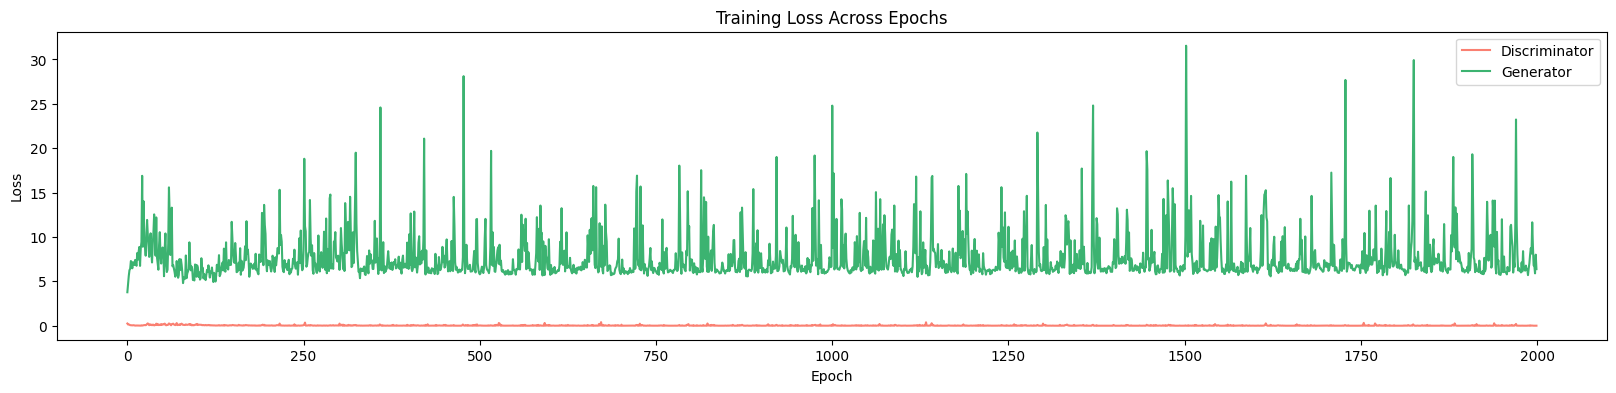

In [80]:
plot_loss_curves(epoch_disc_loss, epoch_gen_loss, 2000)

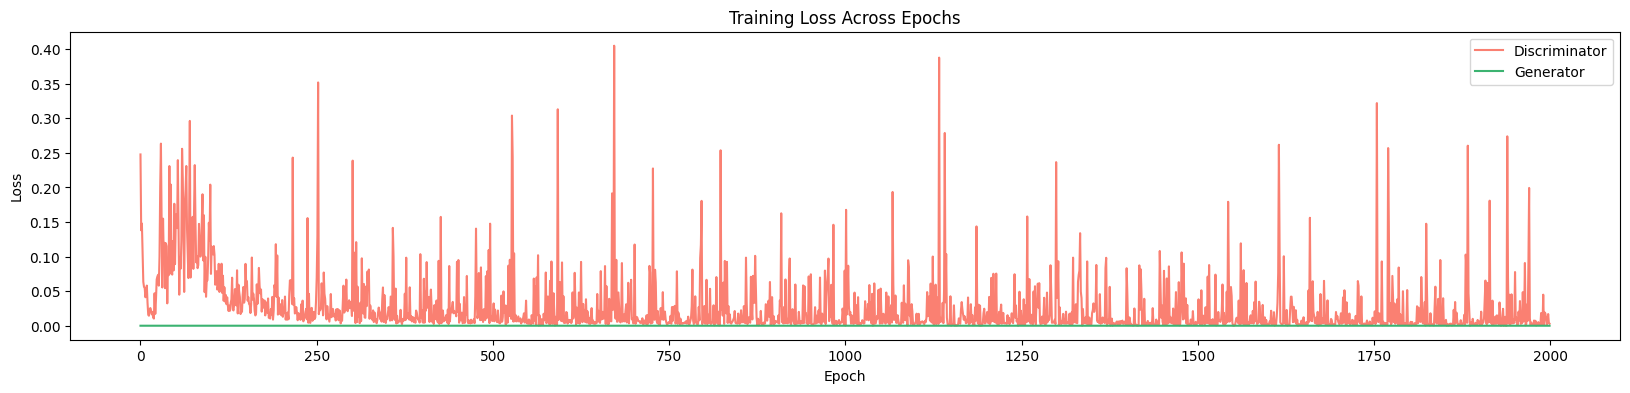

In [81]:
plot_loss_curves(epoch_disc_loss, [0]*2000, 2000)

In [82]:
file = open("pickled/generated_imgs", "rb")
generated_imgs = pickle.load(file)
file.close()

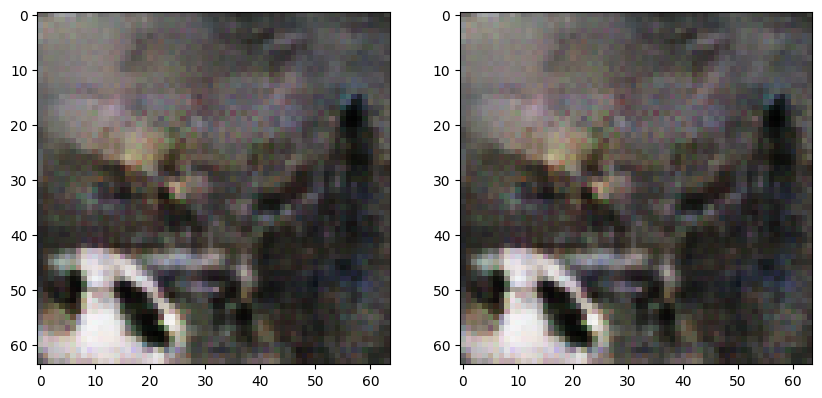

In [164]:
invTrans = transforms.Compose([transforms.Normalize(mean = [0., 0., 0.],
                                                     std = [1/0.5, 1/0.5, 1/0.5]),
                                transforms.Normalize(mean = [-0.5, -0.5, -0.5],
                                                     std = [1., 1., 1.]),
                               ])

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
gen = Generator(1)
gen.load_state_dict(torch.load("pickled/generator.pth"))
img = gen(torch.randn(1, 100, 1, 1))[0].detach()
plt.imshow(np.array(np.transpose(invTrans(img) * 255, (1, 2, 0))).astype(np.uint8))

plt.subplot(1,2,2)
gen2 = Generator(1)
gen2.load_state_dict(torch.load("pickled/generator_last.pth"))
img = gen2(torch.randn(1, 100, 1, 1))[0].detach()
plt.imshow(np.array(np.transpose(invTrans(img) * 255, (1, 2, 0))).astype(np.uint8))

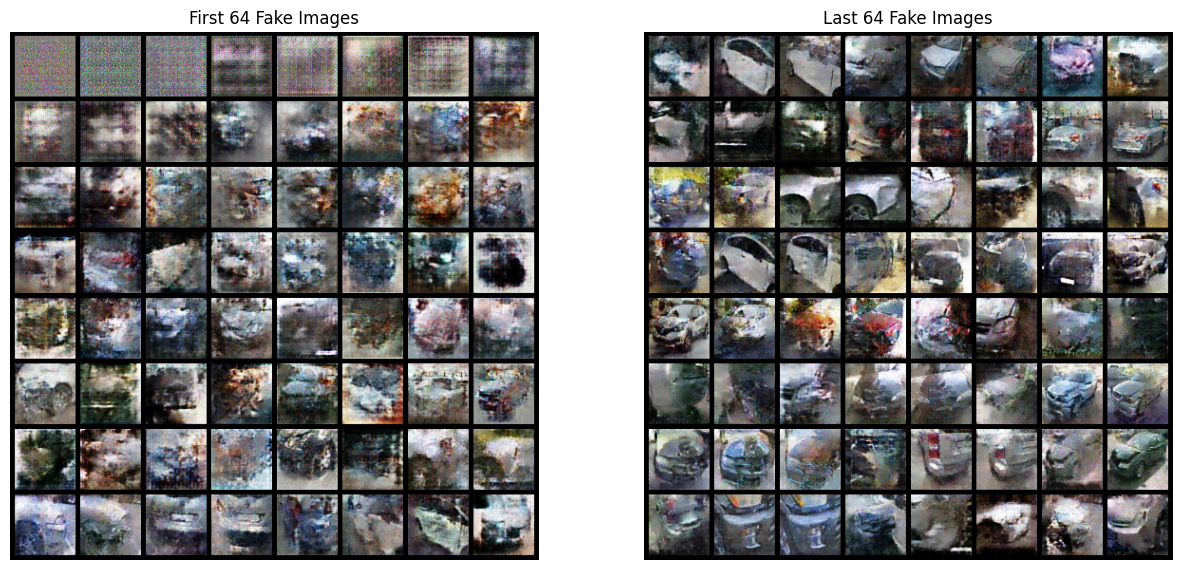

In [166]:
n = 64

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title(f"First {n} Fake Images")
plt.imshow(np.transpose(vutils.make_grid(torch.FloatTensor(np.array(generated_imgs))[:n], padding=5, normalize=True).cpu(),(1,2,0)))

plt.subplot(1,2,2)
plt.axis("off")
plt.title(f"Last {n} Fake Images")
plt.imshow(np.transpose(vutils.make_grid(torch.FloatTensor(np.array(generated_imgs))[-n:], padding=5, normalize=True).cpu(),(1,2,0)))

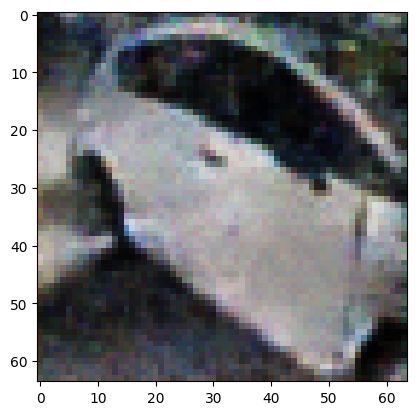

In [159]:
plt.imshow(np.array(np.transpose(invTrans(generated_imgs[-39]) * 255, (1, 2, 0))).astype(np.uint8))

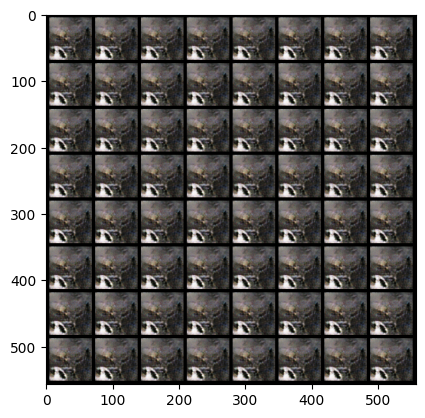

In [169]:
generated_again = []

for _ in range(64):
    generated_again.append(gen2(torch.randn(1, 100, 1, 1)).detach()[0])

plt.imshow(np.transpose(vutils.make_grid(torch.FloatTensor(np.array(generated_again)), padding=5, normalize=True).cpu(),(1,2,0)))